<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1">Project description</a></span></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2">Initialization</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3">EDA</a></span></li><li><span><a href="#Evaluation-Procedure" data-toc-modified-id="Evaluation-Procedure-4">Evaluation Procedure</a></span><ul class="toc-item"><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4.1">Normalization</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-4.2">Train / Test Split</a></span></li><li><span><a href="#Working-with-models" data-toc-modified-id="Working-with-models-4.3">Working with models</a></span><ul class="toc-item"><li><span><a href="#Model-0---Constant" data-toc-modified-id="Model-0---Constant-4.3.1">Model 0 - Constant</a></span></li><li><span><a href="#Prepocessing-with-NLTK-and-TF-IDF" data-toc-modified-id="Prepocessing-with-NLTK-and-TF-IDF-4.3.2">Prepocessing with NLTK and TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Logistic-Regression" data-toc-modified-id="Model-1:-Logistic-Regression-4.3.2.1">Model 1: Logistic Regression</a></span></li><li><span><a href="#Model-2:-Random-Forest-Classifier" data-toc-modified-id="Model-2:-Random-Forest-Classifier-4.3.2.2">Model 2: Random Forest Classifier</a></span></li><li><span><a href="#Model-3---Stochastic-Gradient-Descent-(SGD)-Classifier" data-toc-modified-id="Model-3---Stochastic-Gradient-Descent-(SGD)-Classifier-4.3.2.3">Model 3 - Stochastic Gradient Descent (SGD) Classifier</a></span></li></ul></li><li><span><a href="#Preprocessing-with-spaCy-and-TF-IDF" data-toc-modified-id="Preprocessing-with-spaCy-and-TF-IDF-4.3.3">Preprocessing with spaCy and TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Logistic-Regression" data-toc-modified-id="Model-1:-Logistic-Regression-4.3.3.1">Model 1: Logistic Regression</a></span></li><li><span><a href="#Model-2:-Random-Forest-Classifier" data-toc-modified-id="Model-2:-Random-Forest-Classifier-4.3.3.2">Model 2: Random Forest Classifier</a></span></li><li><span><a href="#Model-3---Stochastic-Gradient-Descent" data-toc-modified-id="Model-3---Stochastic-Gradient-Descent-4.3.3.3">Model 3 - Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Preprocessing-with-BERT" data-toc-modified-id="Preprocessing-with-BERT-4.3.4">Preprocessing with BERT</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Logistic-Regression" data-toc-modified-id="Model-1:-Logistic-Regression-4.3.4.1">Model 1: Logistic Regression</a></span></li><li><span><a href="#Model-2:-Random-Forest-Classifier" data-toc-modified-id="Model-2:-Random-Forest-Classifier-4.3.4.2">Model 2: Random Forest Classifier</a></span></li><li><span><a href="#Model-3:-Stochastic-Gradient-Descent" data-toc-modified-id="Model-3:-Stochastic-Gradient-Descent-4.3.4.3">Model 3: Stochastic Gradient Descent</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#My-Reviews" data-toc-modified-id="My-Reviews-5">My Reviews</a></span></li><li><span><a href="#Project-conclusion" data-toc-modified-id="Project-conclusion-6">Project conclusion</a></span></li></ul></div>

# Project description

<b>Project description</b><br>
The Film Junky Union is a community for classic movie enthusiasts. It is developing a system for filtering and categorizing movie reviews.<br>
<b> The task</b> is to train a model to automatically detect negative reviews.<br>
<b> The goal</b> is using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to reach an F1 score of at least 0.85.<br>
<b>Data description</b><br>
The data was provided by Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011). Here's the description of the selected fields:<br>

<i>review</i> : the review text<br>
<i>pos</i>  : the target, '0' for negative and '1' for positive<br>
<i>ds_part</i> : 'train'/'test' for the train/test part of dataset, correspondingly<br>
    

# Initialization

In [1]:
from platform import python_version
# 3.9.5
print(python_version())

3.9.5


In [97]:
import math
import re
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import transformers
import spacy
from sklearn.metrics import f1_score

#models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [4]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

In [5]:
df_reviews = pd.read_csv('imdb_reviews.tsv', sep='\t',  dtype={'votes': 'Int64'})

In [6]:
df_reviews.sample(5)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
37152,tt0033660,movie,The Ghost Train,The Ghost Train,1941,\N,85,0,"Comedy,Horror",6.3,1325,This film is one of those nostalgia things wit...,9,pos,1,train,4847
9984,tt0099422,movie,Dick Tracy,Dick Tracy,1990,\N,105,0,"Action,Comedy,Crime",6.1,56169,Director Warren Beatty's intention to turn Che...,4,neg,0,train,3770
36039,tt0088983,movie,The Dagger of Kamui,Kamui no ken,1985,\N,132,0,"Action,Adventure,Animation",6.9,613,This is an excellent anime movie. It is well a...,10,pos,1,test,12117
5237,tt0493402,movie,Boarding Gate,Boarding Gate,2007,\N,106,0,"Drama,Thriller",5.1,3445,The trailer is so deceiving... I thought this ...,1,neg,0,test,7825
21613,tt0248169,movie,Manna from Heaven,Manna from Heaven,2002,\N,119,0,Comedy,5.7,440,I thoroughly enjoyed Gabrielle Burton's story ...,10,pos,1,test,10995


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [8]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


# EDA

Let's check the number of movies and reviews over years.

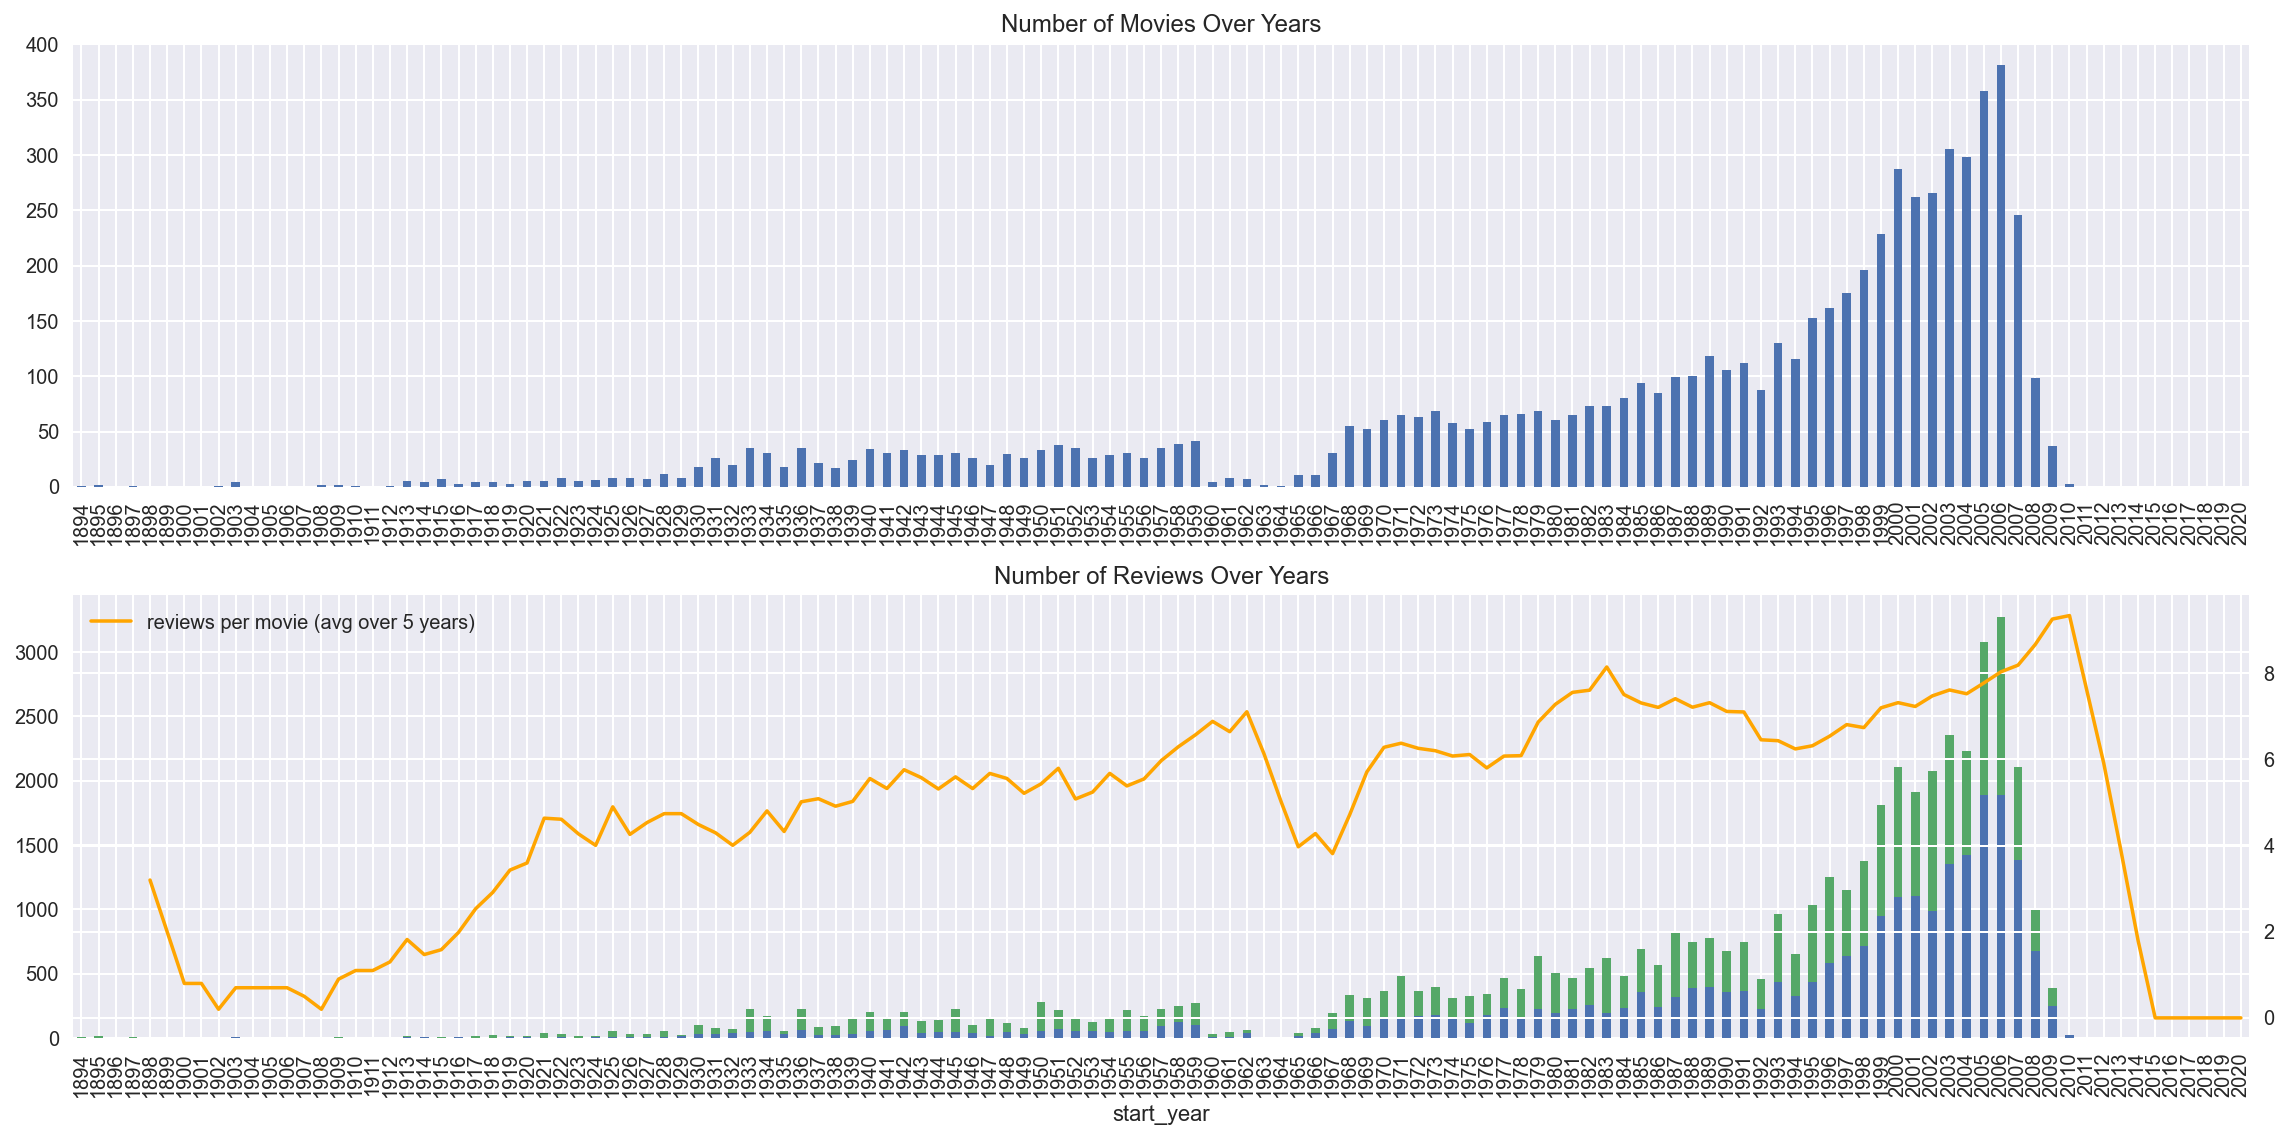

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates(
)['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(
    dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(
    dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(
    dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(
    color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

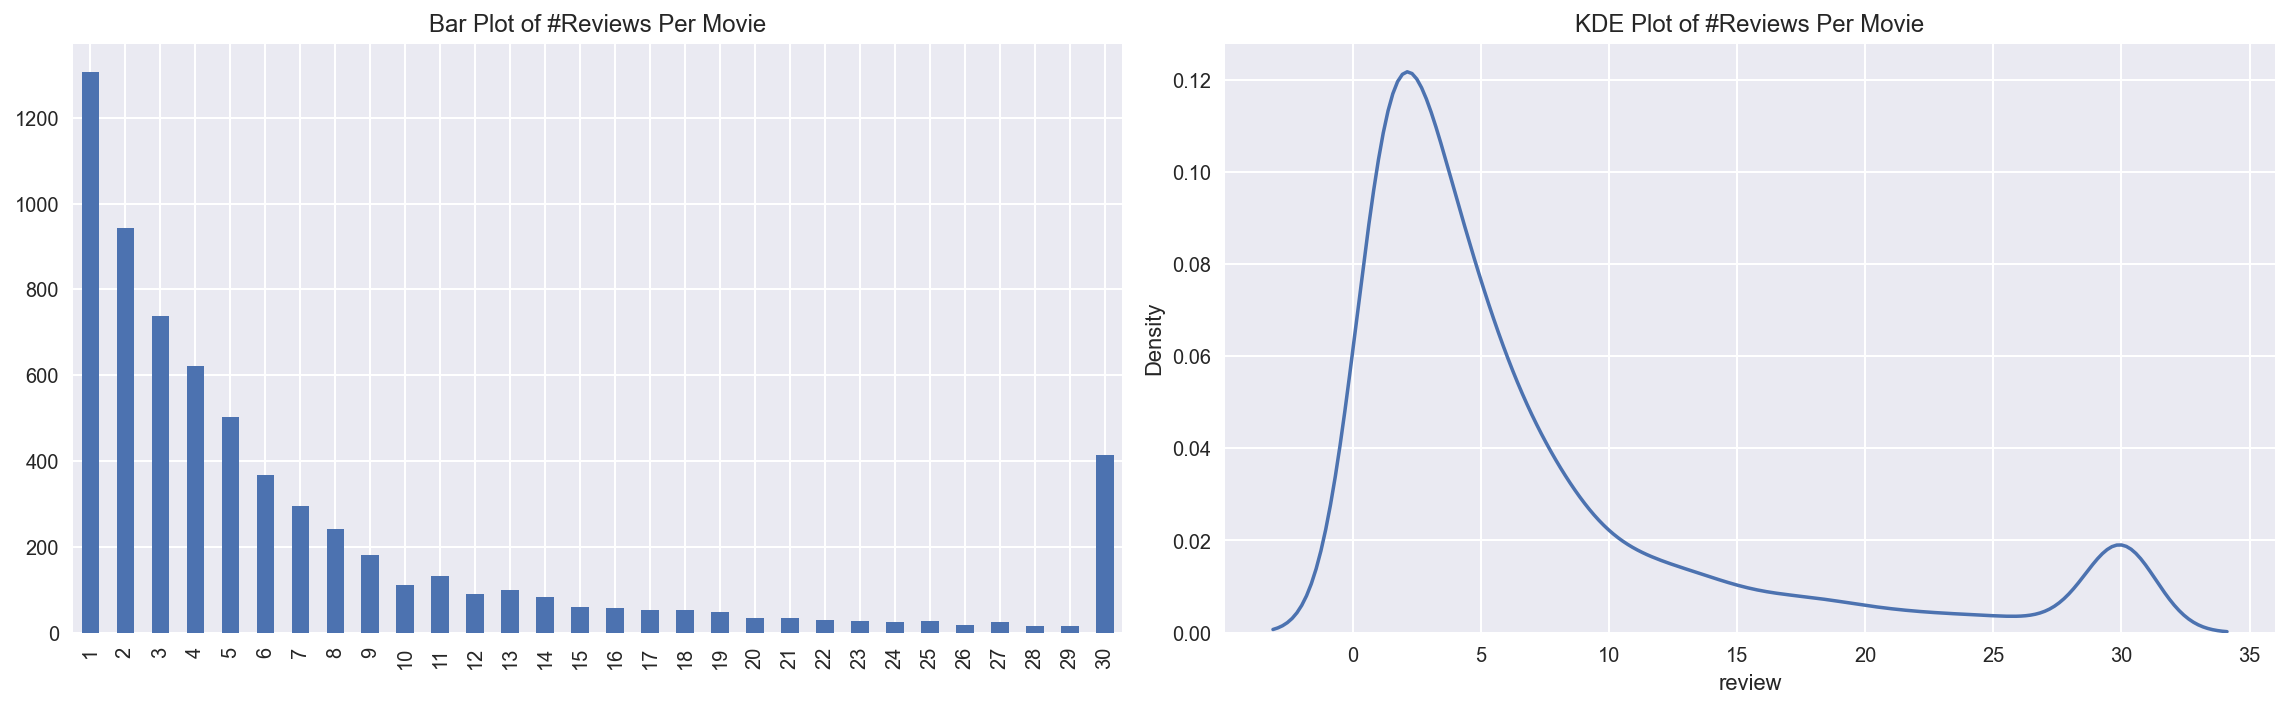

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Let's check class balance.

In [11]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

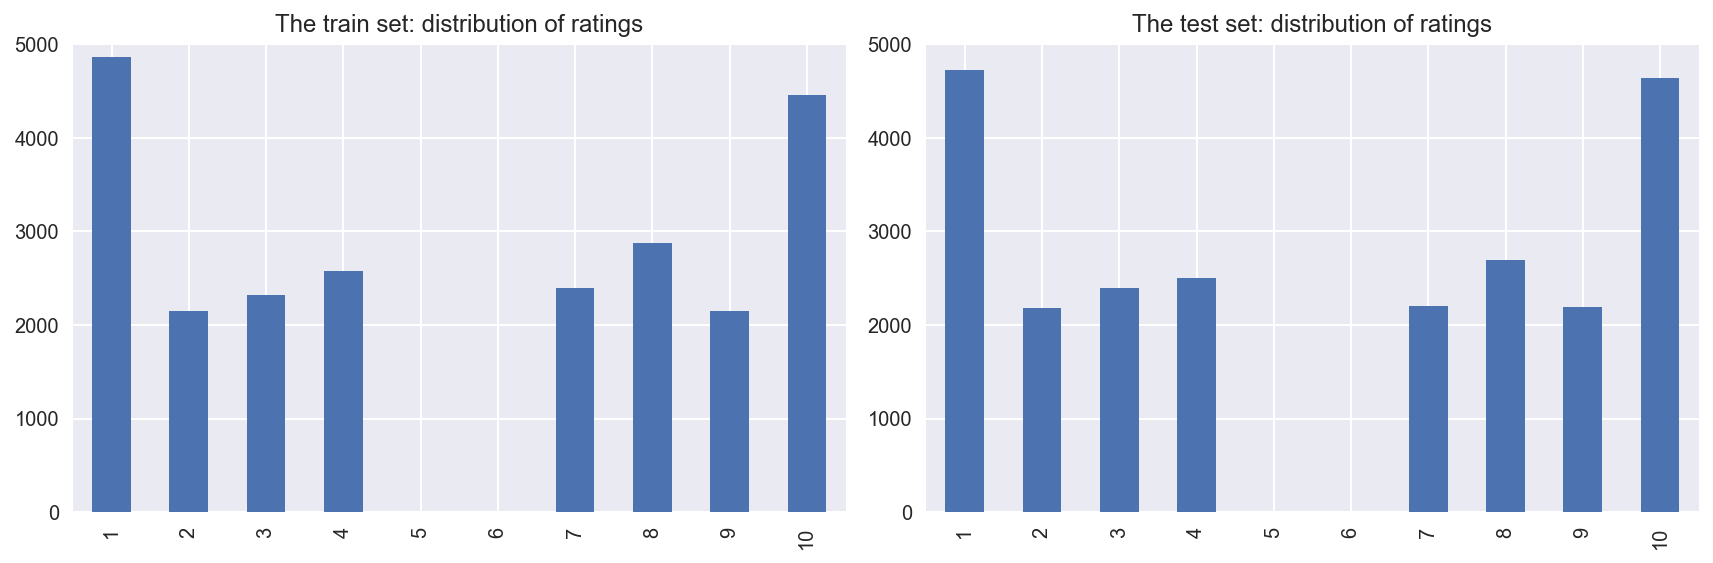

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

Train and test sets have approximately the same distribution of ratings, which is important because the models will not be prejudiced.

Distribution of negative and positive reviews over the years for two parts of the dataset

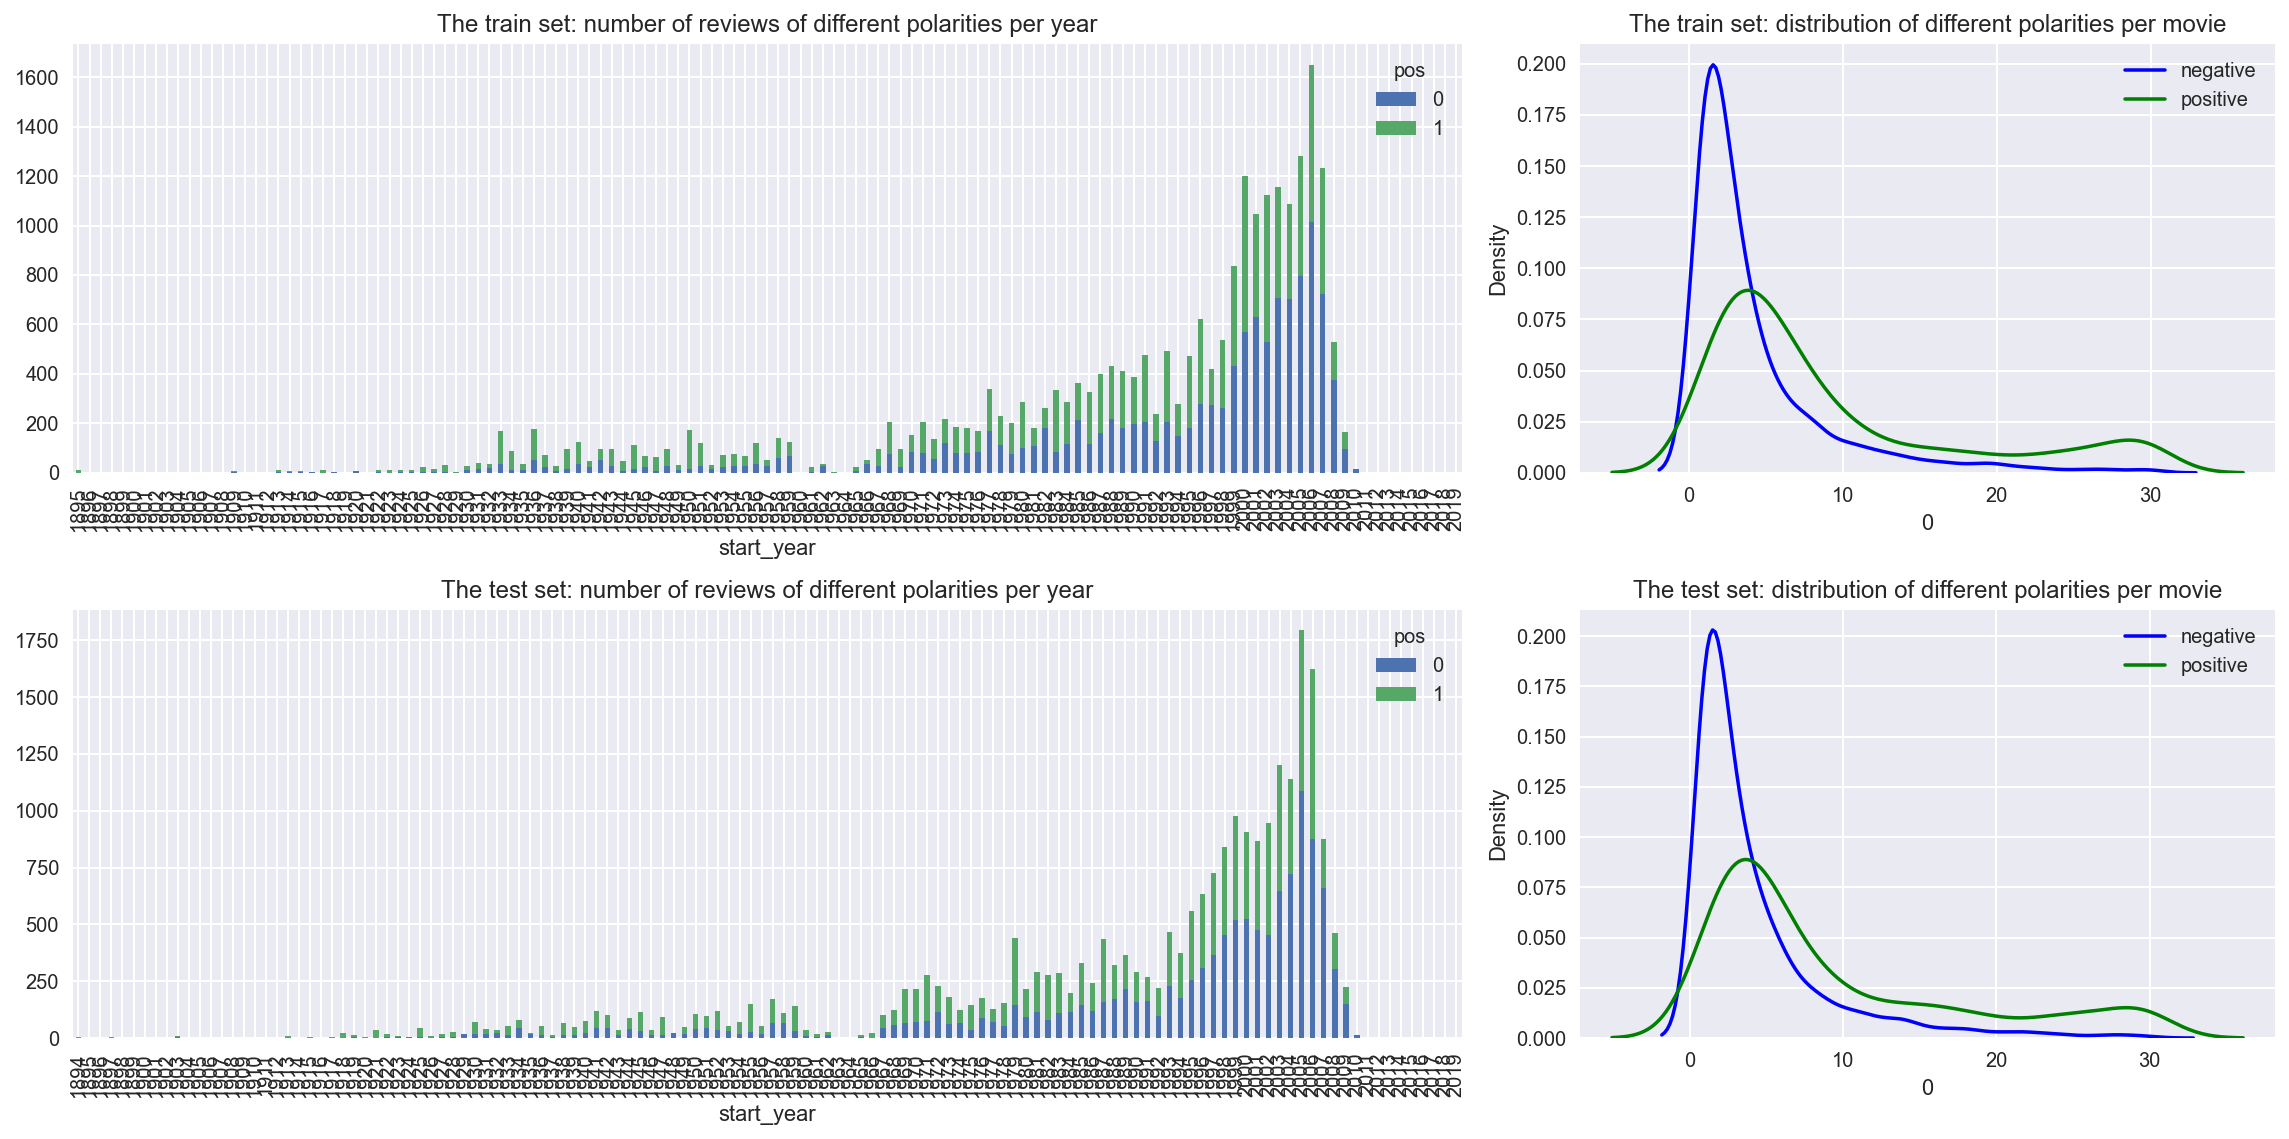

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(
    width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(
    ['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(
    dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title(
    'The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(
    ['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(
    ['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(
    dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(
    ['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

According to the density distribution plots, negative comments are more often. This tendency is the same in both train and test sets.

# Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [14]:
import sklearn.metrics as metrics


def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold)
                     for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(
            target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color,
                label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(
            target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(
        index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [15]:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-z\']', ' ', text)
    clean_text = " ".join(clean_text.split())
    return clean_text

In [16]:
df_reviews['review_clear'] = df_reviews['review'].apply(clear_text).apply(str.lower)

In [17]:
df_reviews['review_clear'] 

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
2        there is no real story the film seems more lik...
3        um a serious film about troubled teens in sing...
4        i'm totally agree with garryjohal from singapo...
                               ...                        
47326    this is another of my favorite columbos it spo...
47327    talk about being boring i got this expecting a...
47328    i never thought i'd say this about a biopic bu...
47329    spirit and chaos is an artistic biopic of miya...
47330    i'll make this brief this was a joy to watch i...
Name: review_clear, Length: 47331, dtype: object

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

y_train = df_reviews_train['pos']
y_test = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

We will try different text preprocessing techniques with the same three models: Logistic Regression, Random Forest Classifier and Stochastic Gradient Descent. Our goal in this exercise is to check how different preprocessing techniques affect models' performance. 

### Model 0 - Constant

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy_clf = DummyClassifier()
dummy_clf.fit(df_reviews_train['review_clear'], y_train)

DummyClassifier()

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


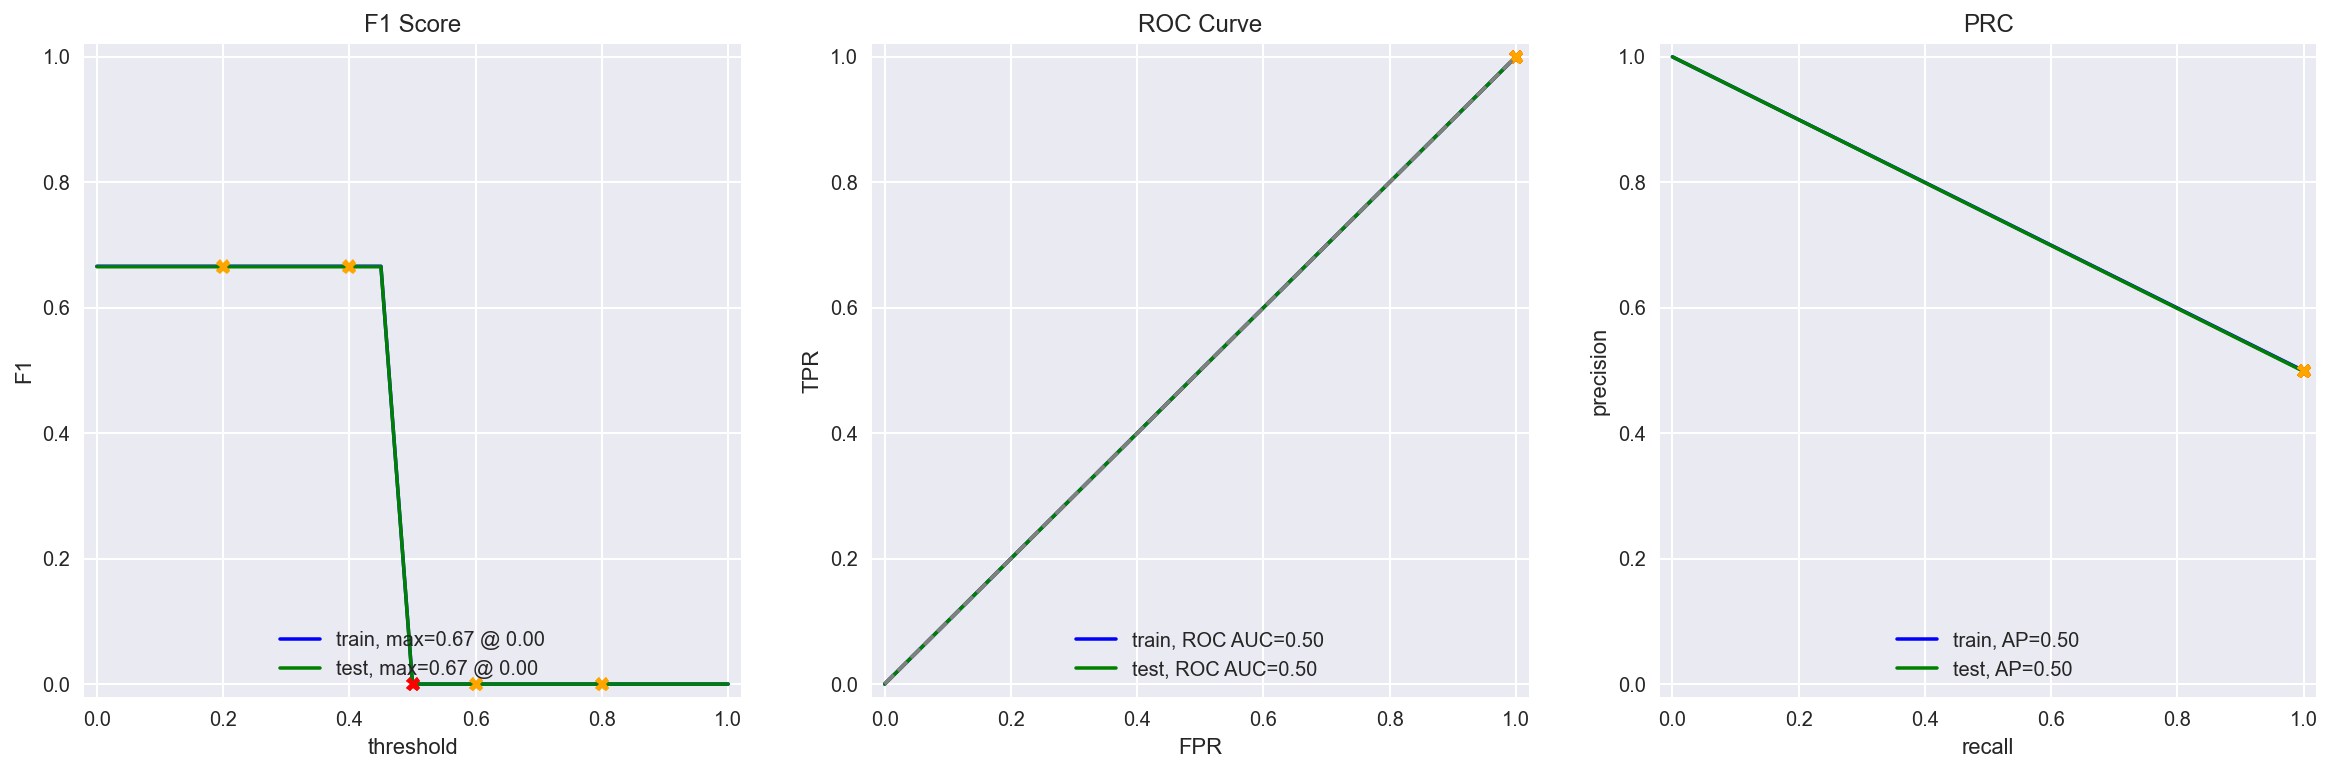

In [21]:
evaluate_model(dummy_clf, df_reviews_train['review_clear'], y_train, df_reviews_test['review_clear'], y_test)

As expected, the dummy model did horribly. 50% accurate and 0 F1 score.

###  Prepocessing with NLTK and TF-IDF 

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
def lemmatize_nltk(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    lemmas = []
    lemmas = [lemmatizer.lemmatize(token) for token in tokens] 
    return ' '.join(lemmas)

In [24]:
df_reviews_train['review_nltk'] = df_reviews['review_clear'].apply(lemmatize_nltk)
df_reviews_test['review_nltk'] = df_reviews['review_clear'].apply(lemmatize_nltk)

In [27]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
nltk_X_train = count_tf_idf.fit_transform(df_reviews_train['review_nltk'])
nltk_X_test = count_tf_idf.transform(df_reviews_test['review_nltk'])

#### Model 1: Logistic Regression

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


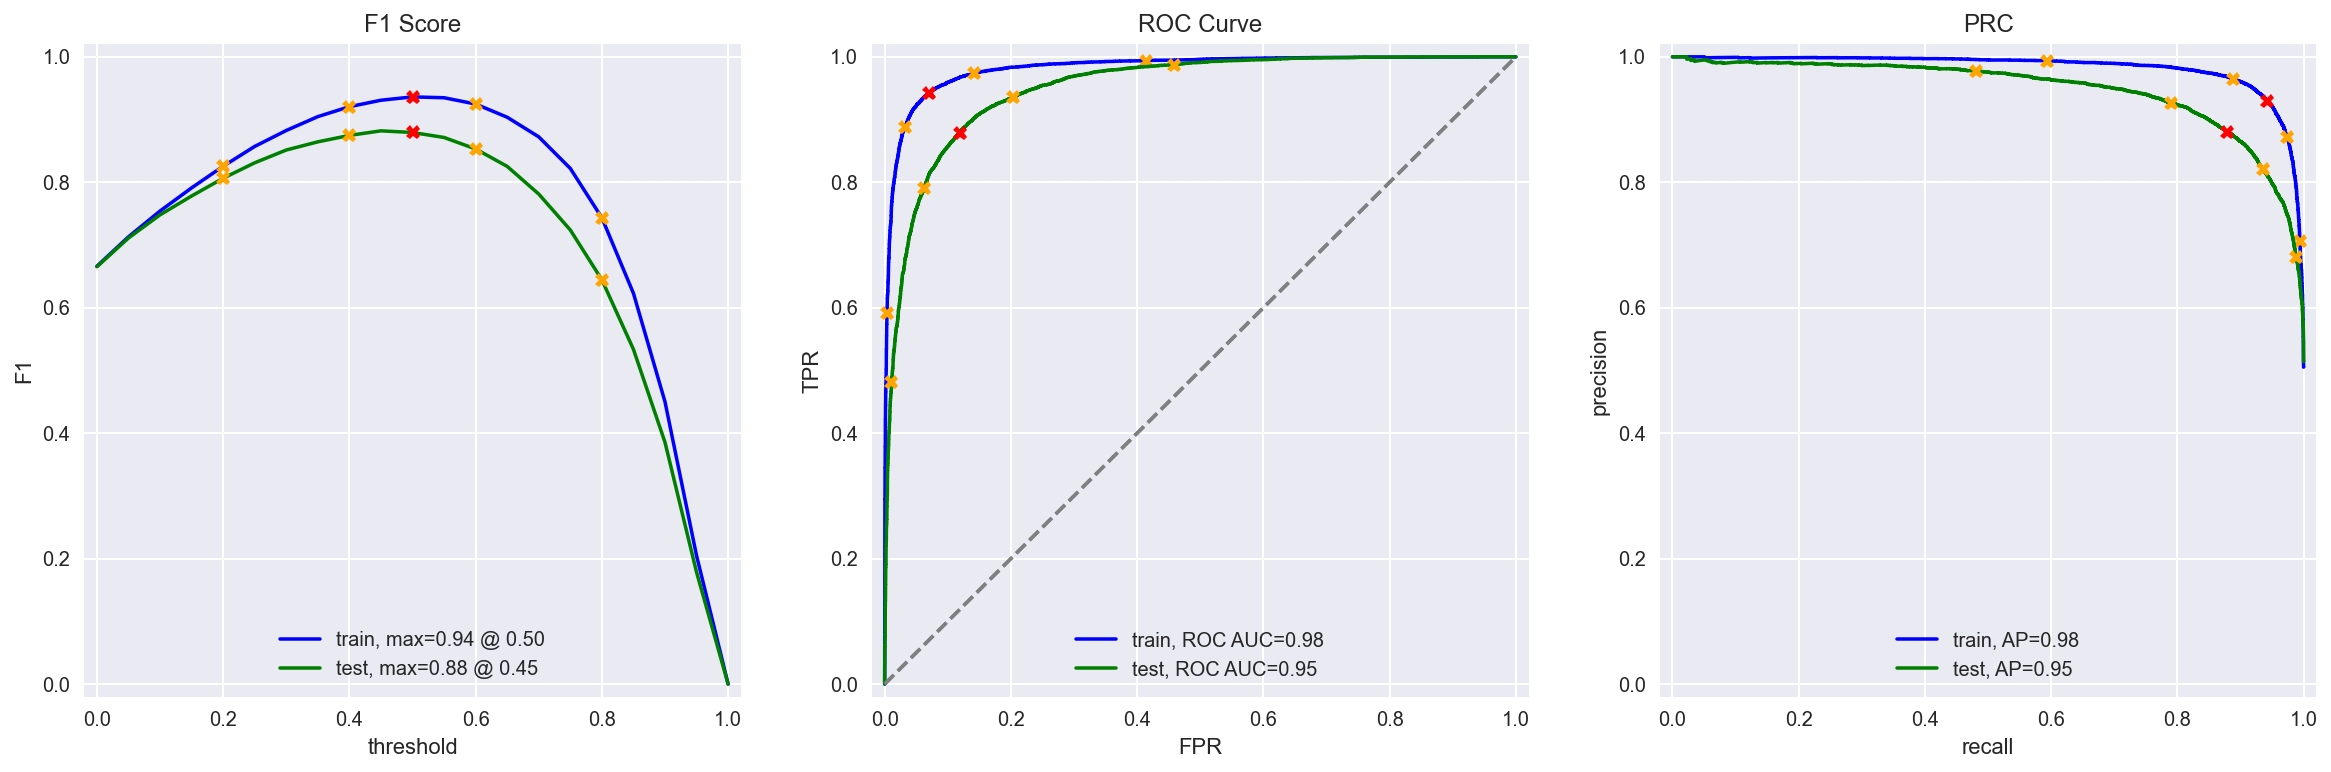

In [42]:
glm_nltk = LogisticRegression()
glm_nltk.fit(nltk_X_train, y_train)
evaluate_model(glm_nltk, nltk_X_train, y_train, nltk_X_test, y_test)

#### Model 2: Random Forest Classifier

          train  test
Accuracy    1.0  0.85
F1          1.0  0.84
APS         1.0  0.91
ROC AUC     1.0  0.92


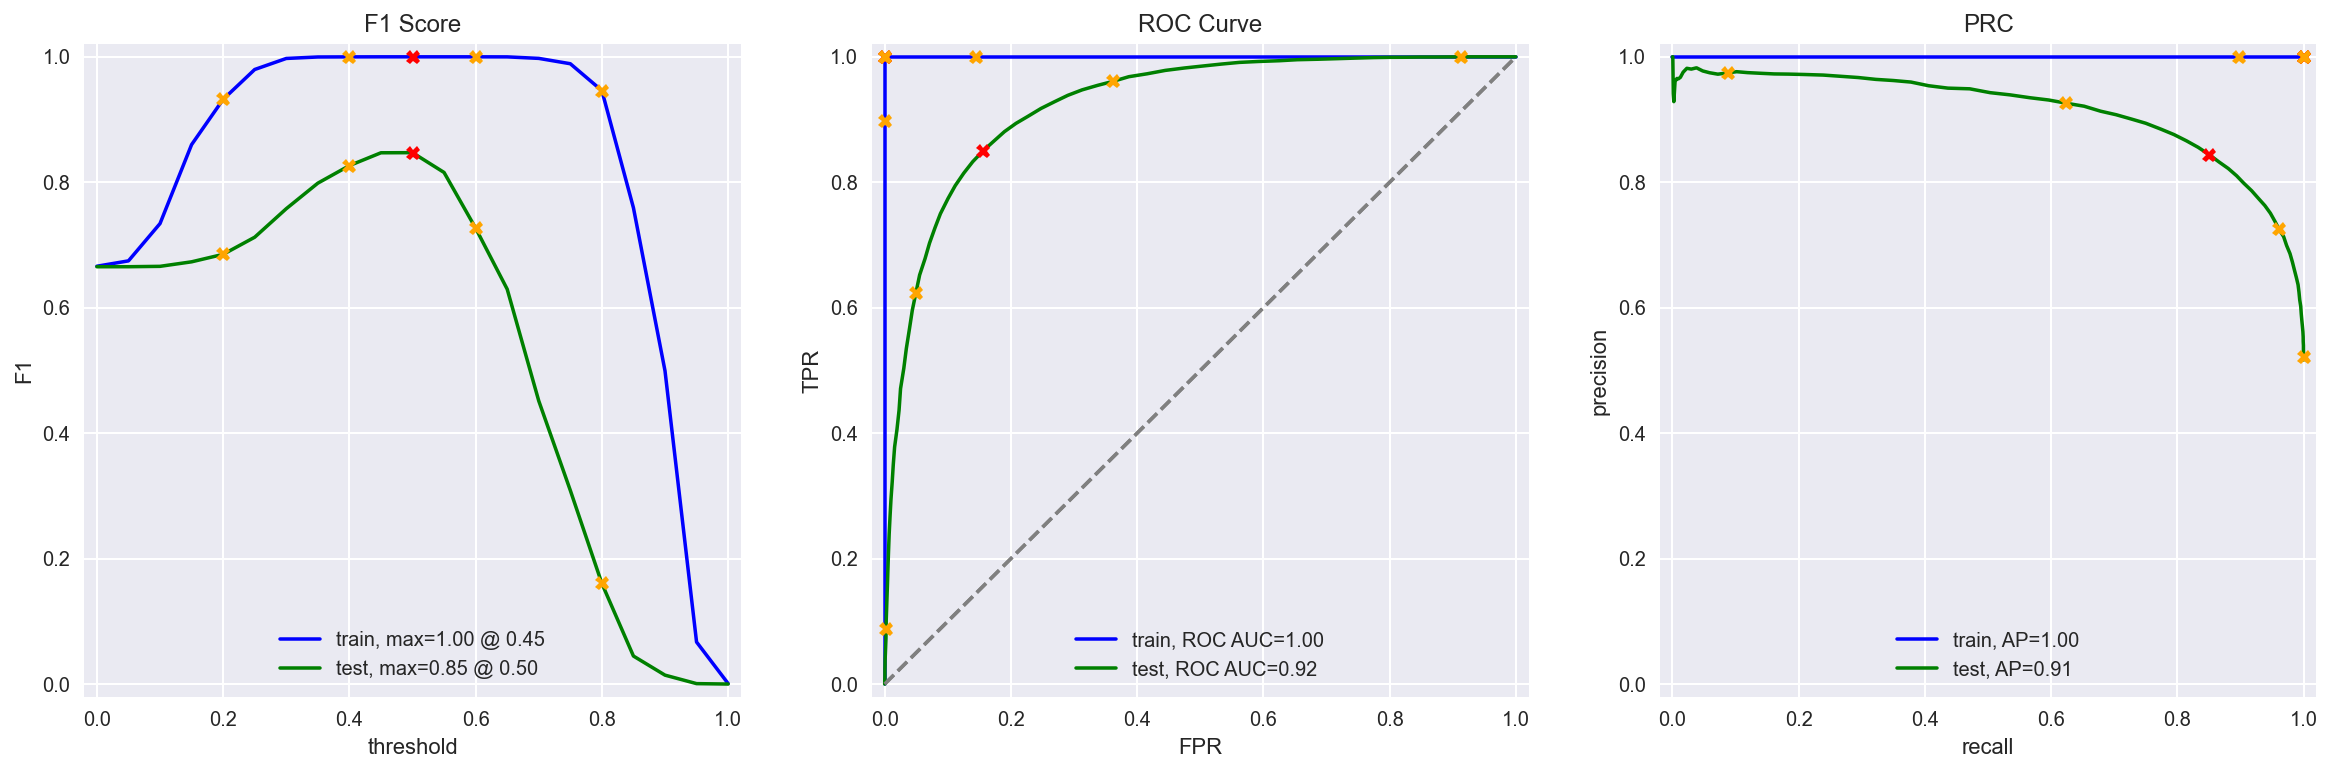

In [43]:
rfc_nltk = RandomForestClassifier()
rfc_nltk.fit(nltk_X_train, y_train)
evaluate_model(rfc_nltk, nltk_X_train, y_train, nltk_X_test, y_test)

#### Model 3 - Stochastic Gradient Descent (SGD) Classifier

Stochastic Gradient Descent (SGD) classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)(ref. publisher logoHands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron Published by O'Reilly Media, Inc., 2019 ).

          train  test
Accuracy   0.91  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


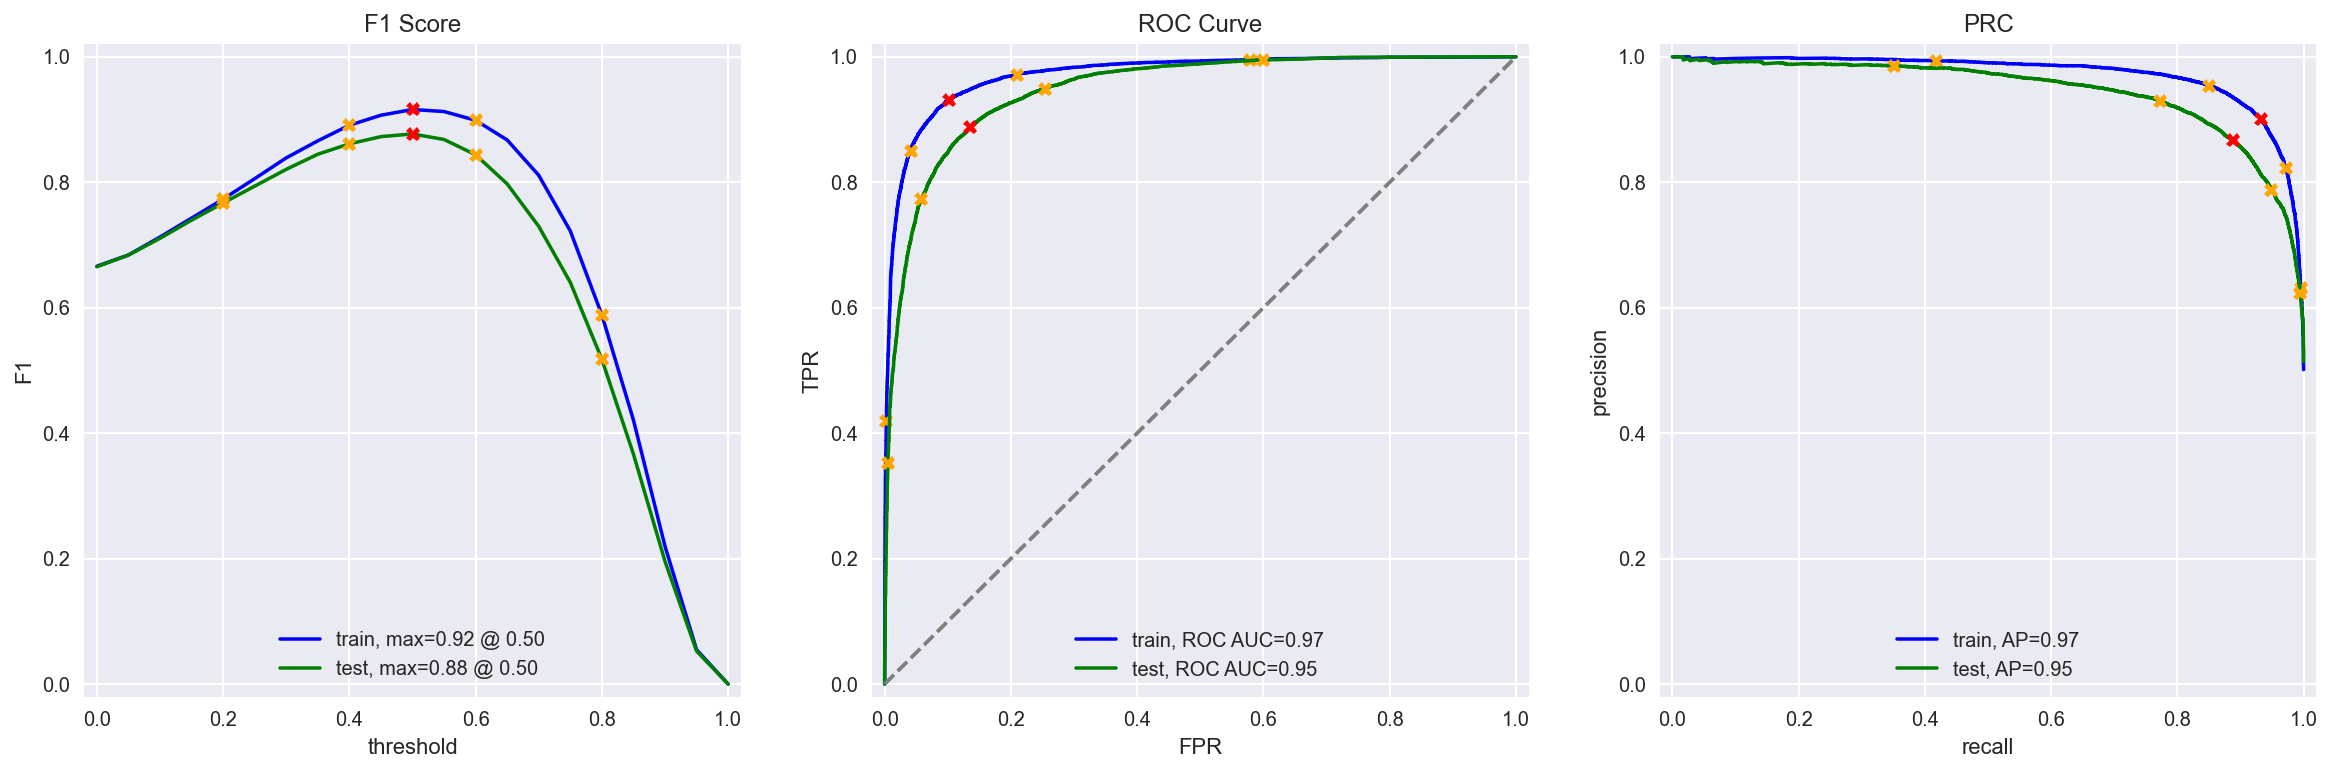

In [107]:
sgd_clf_nltk = SGDClassifier(loss='log') #The ‘log’ loss gives logistic regression, a probabilistic classifier
sgd_clf_nltk.fit(nltk_X_train, y_train)
evaluate_model(sgd_clf_nltk, nltk_X_train, y_train, nltk_X_test, y_test)

Conclusion: we tried three models with data preprocessed with NLTK and TF-IDF, two of which - Logistic Regression and SGD gave appropriate levels of F1 both on train and test set. Logistic Regression somewhat overfit on the training set.

### Preprocessing with spaCy and TF-IDF

In [36]:
# getting list of lemmatized words for a text
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

In [37]:
def lemmatize_spacy(text):
    doc = nlp(text.lower())
    lemmas = []
    #for token in doc:
        #lemmas.append(token.lemma_)
    lemmas = [token.lemma_ for token in doc] 
    return ' '.join(lemmas)

In [38]:
df_reviews_train['review_spacy'] = df_reviews_train['review_clear'].apply(lemmatize_spacy)
df_reviews_test['review_spacy'] = df_reviews_test['review_clear'].apply(lemmatize_spacy)

In [39]:
spacy_X_train = count_tf_idf.fit_transform(df_reviews_train['review_spacy'])
spacy_X_test = count_tf_idf.transform(df_reviews_test['review_spacy'])

#### Model 1: Logistic Regression

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


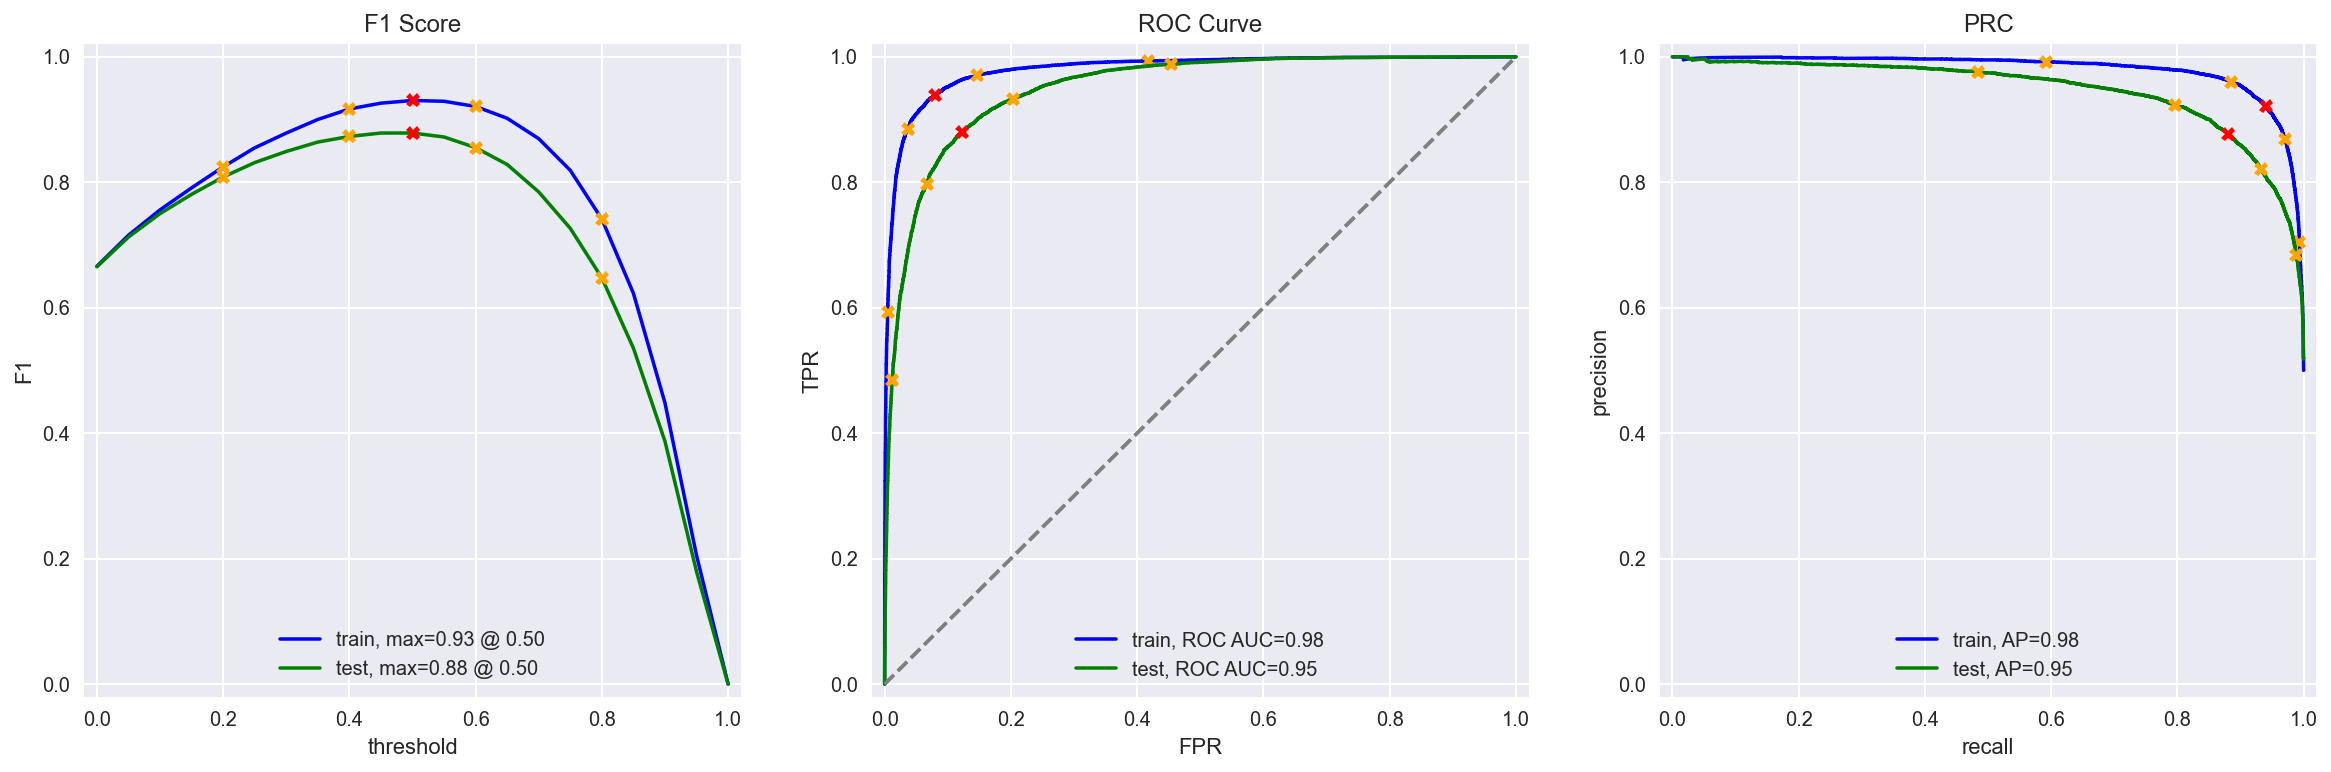

In [40]:
glm_spacy = LogisticRegression()
glm_spacy.fit(spacy_X_train, y_train)
evaluate_model(glm_spacy, spacy_X_train, y_train, spacy_X_test, y_test)

#### Model 2: Random Forest Classifier

          train  test
Accuracy    1.0  0.85
F1          1.0  0.84
APS         1.0  0.92
ROC AUC     1.0  0.92


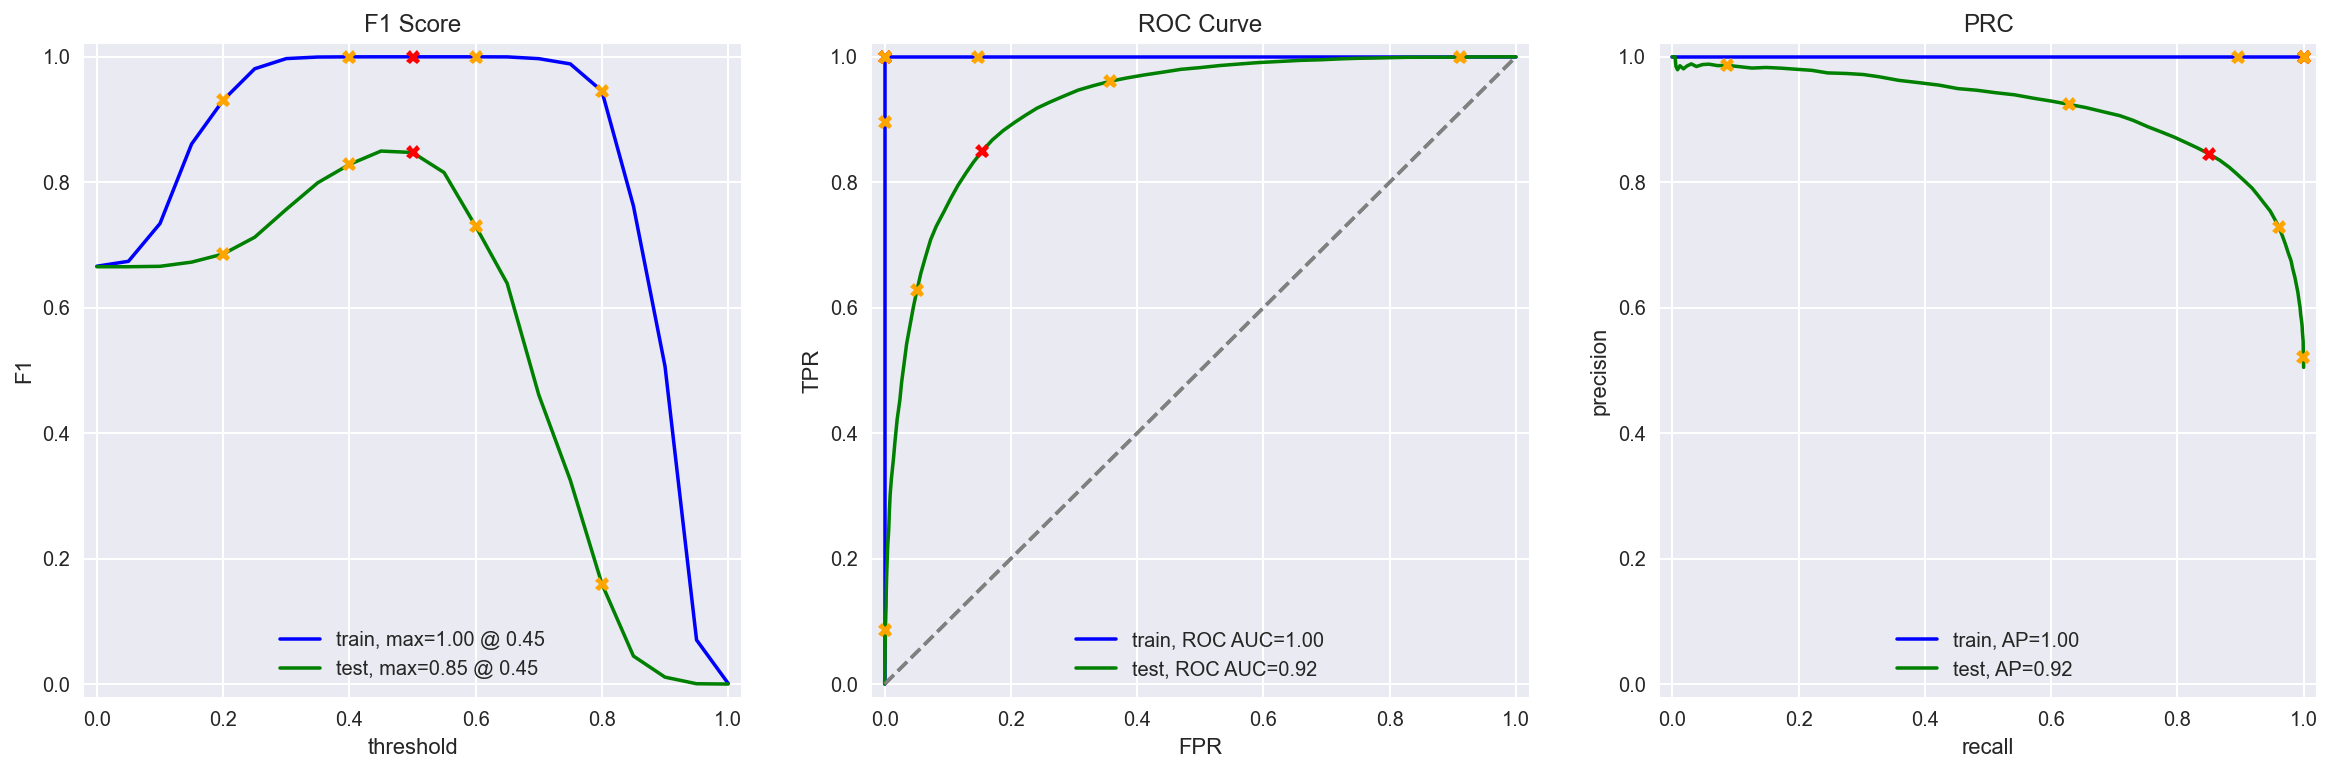

In [41]:
rfc_spacy = RandomForestClassifier()
rfc_spacy.fit(spacy_X_train, y_train)
evaluate_model(rfc_spacy, spacy_X_train, y_train, spacy_X_test, y_test)

#### Model 3 - Stochastic Gradient Descent 

          train  test
Accuracy   0.91  0.88
F1         0.91  0.88
APS        0.97  0.94
ROC AUC    0.97  0.95


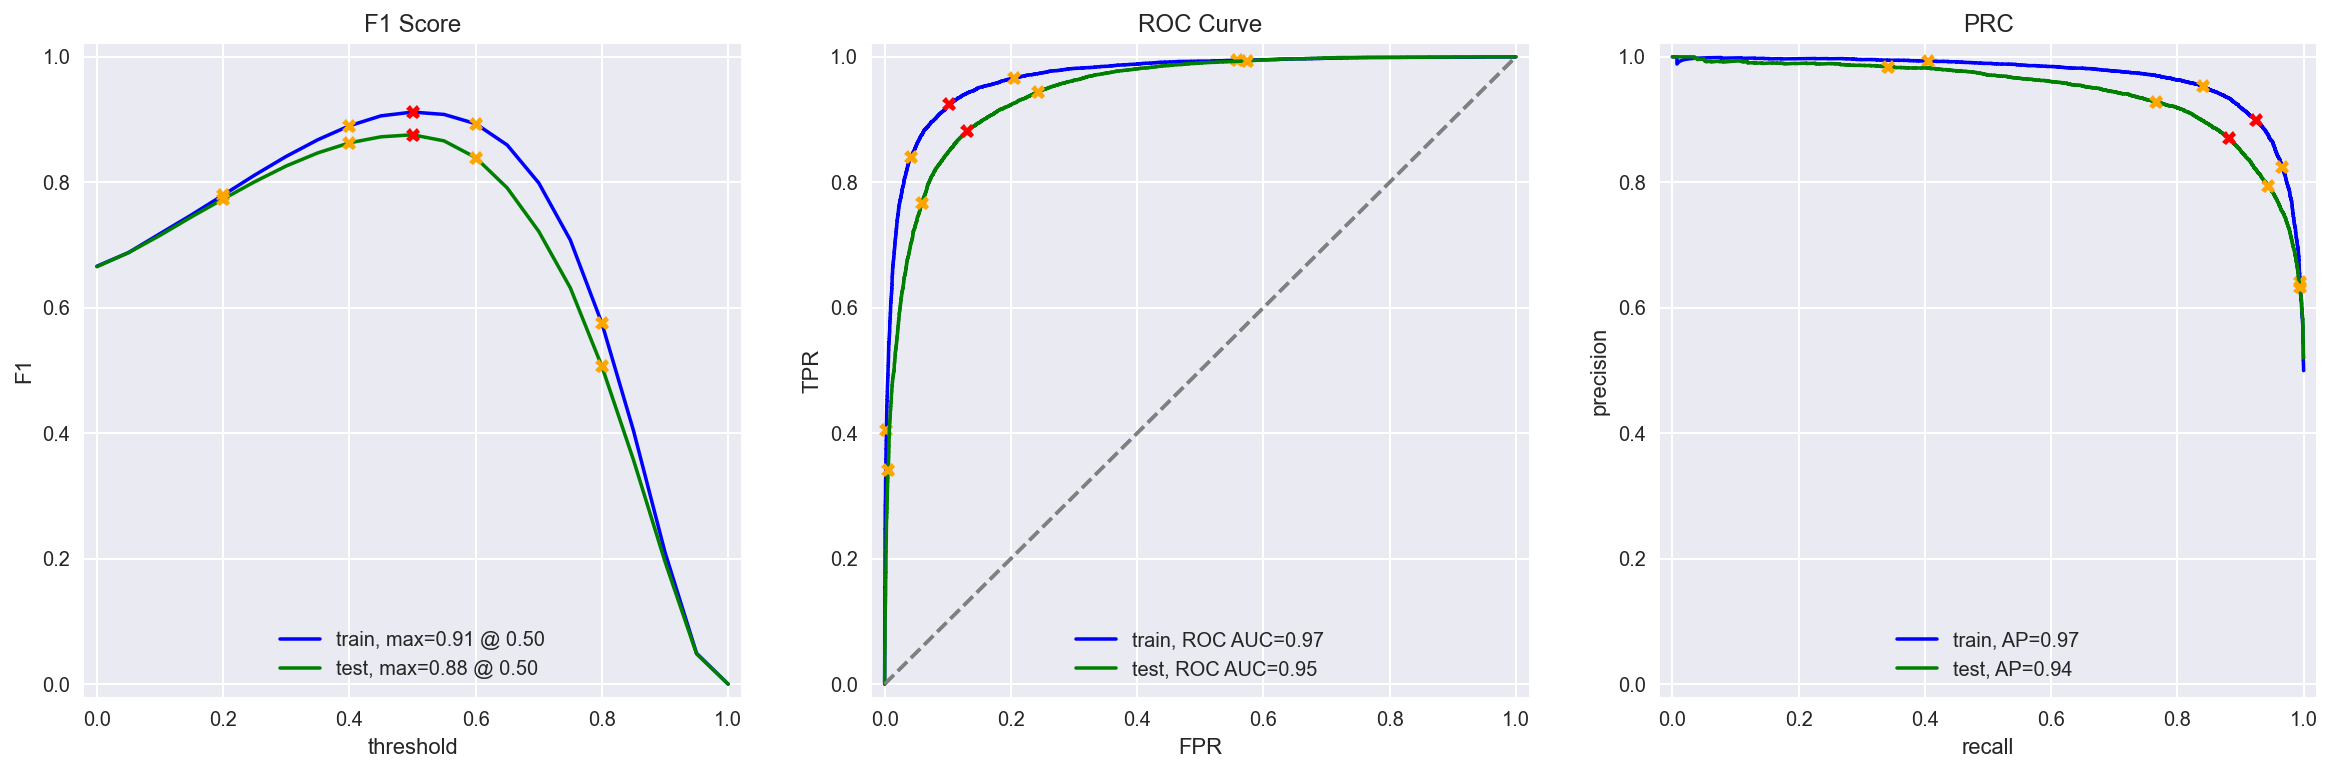

In [45]:
sgd_clf_spacy = SGDClassifier(loss='log') #The ‘log’ loss gives logistic regression, a probabilistic classifier
sgd_clf_spacy.fit(spacy_X_train, y_train)
evaluate_model(sgd_clf_spacy, spacy_X_train, y_train, spacy_X_test, y_test)

Our results are pretty much the same as they were with NLTK text preprocessing method. The downside of using spaCy is time: it took very long time to run the lemmatization model.

###  Preprocessing with BERT

In [46]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):

    ids_list = []
    attention_mask_list = []
    max_sample_size = texts.shape[0]

    # text to padded ids of tokens along with their attention masks

    # <put your code here to create ids_list and attention_mask_list>
    for input_text in texts.iloc[:max_sample_size]['review']:
        ids = tokenizer.encode(input_text.lower(
        ), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')

    # gettings embeddings in batches
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):

        ids_batch = torch.LongTensor(
            ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(
            attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(
                input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:, 0, :].detach().cpu().numpy())

    return np.concatenate(embeddings)

The code below is commented out on purpose. Running BERT on this dataset took almost 16 hours, so we provide below the result of that step by loading

In [ ]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#train_features_9 = BERT_text_to_embeddings(df_train, force_device=None)

In [ ]:
#np.save('BERT_X_train.npy', train_features_9)

In [ ]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#test_features_9 = BERT_text_to_embeddings(df_test, force_device=None)

In [ ]:
#np.save('BERT_X_test.npy', test_features_9)

In [48]:
BERT_X_train = np.load('BERT_X_train.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [49]:
BERT_X_test = np.load('BERT_X_test.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

#### Model 1: Logistic Regression

          train  test
Accuracy   0.89  0.88
F1         0.89  0.88
APS        0.95  0.95
ROC AUC    0.95  0.95


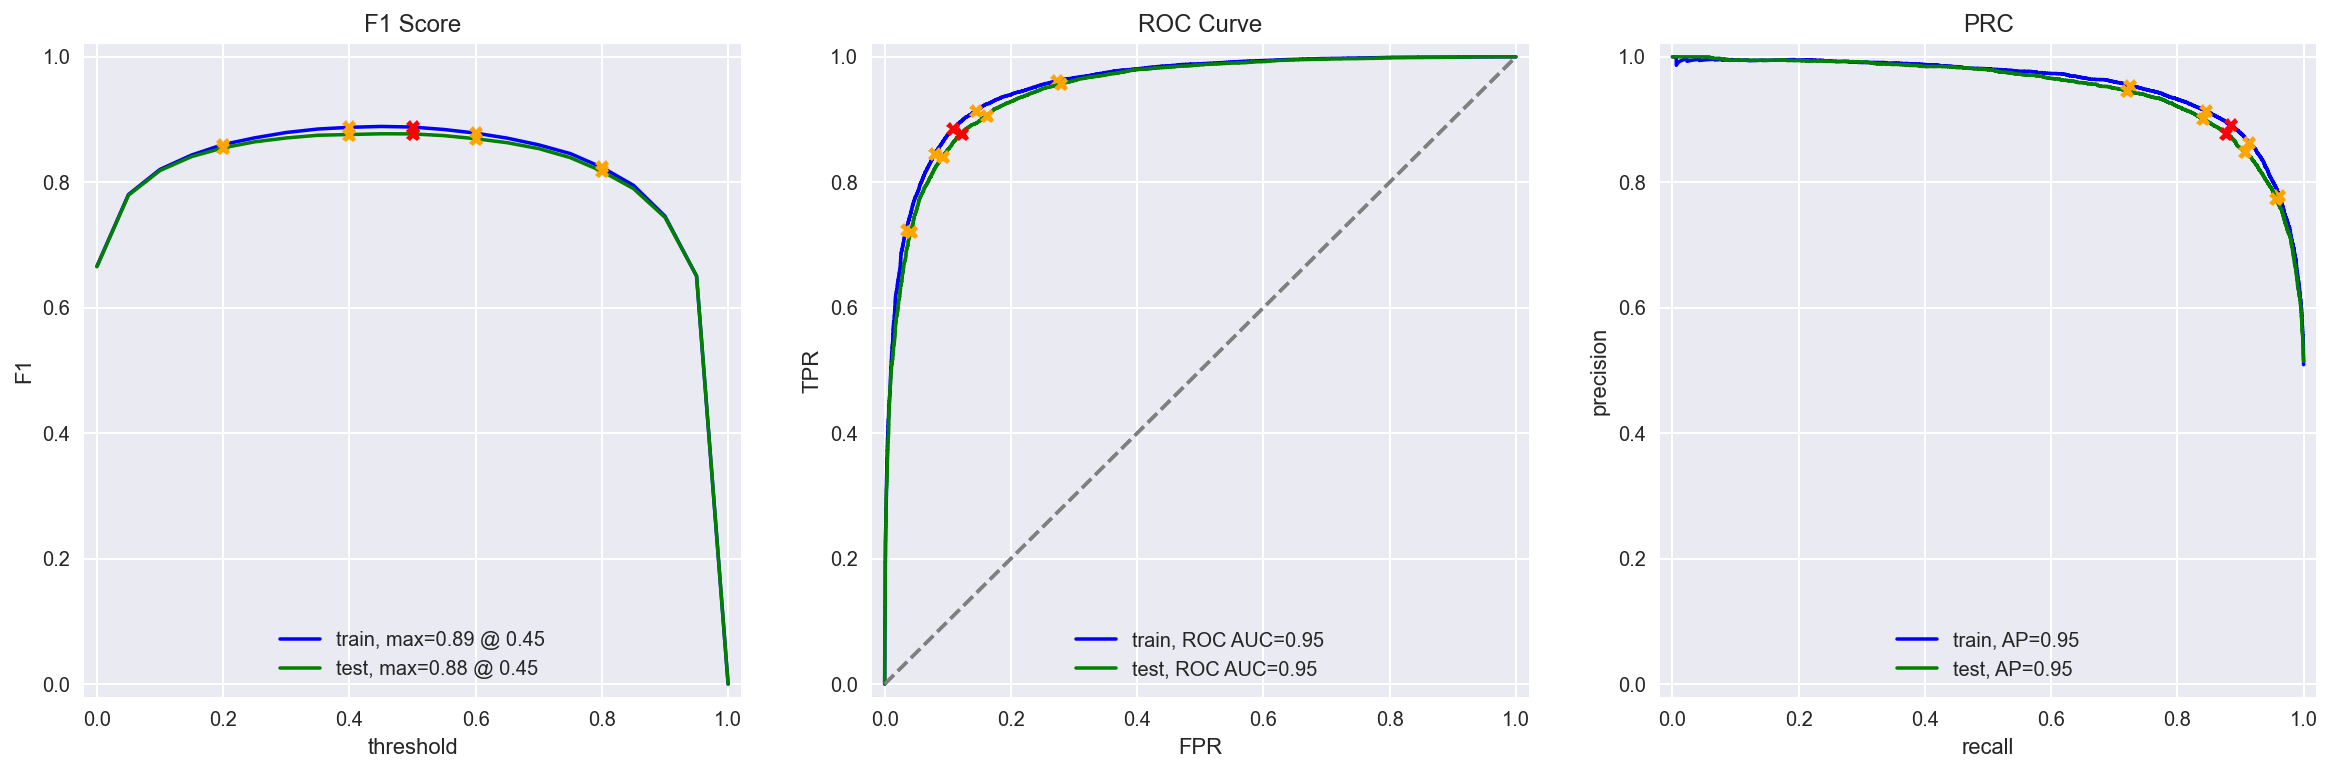

In [50]:
glm_BERT = LogisticRegression()
glm_BERT.fit(BERT_X_train, y_train)
evaluate_model(glm_BERT, BERT_X_train, y_train, BERT_X_test, y_test)

#### Model 2: Random Forest Classifier

          train  test
Accuracy    1.0  0.83
F1          1.0  0.83
APS         1.0  0.91
ROC AUC     1.0  0.91


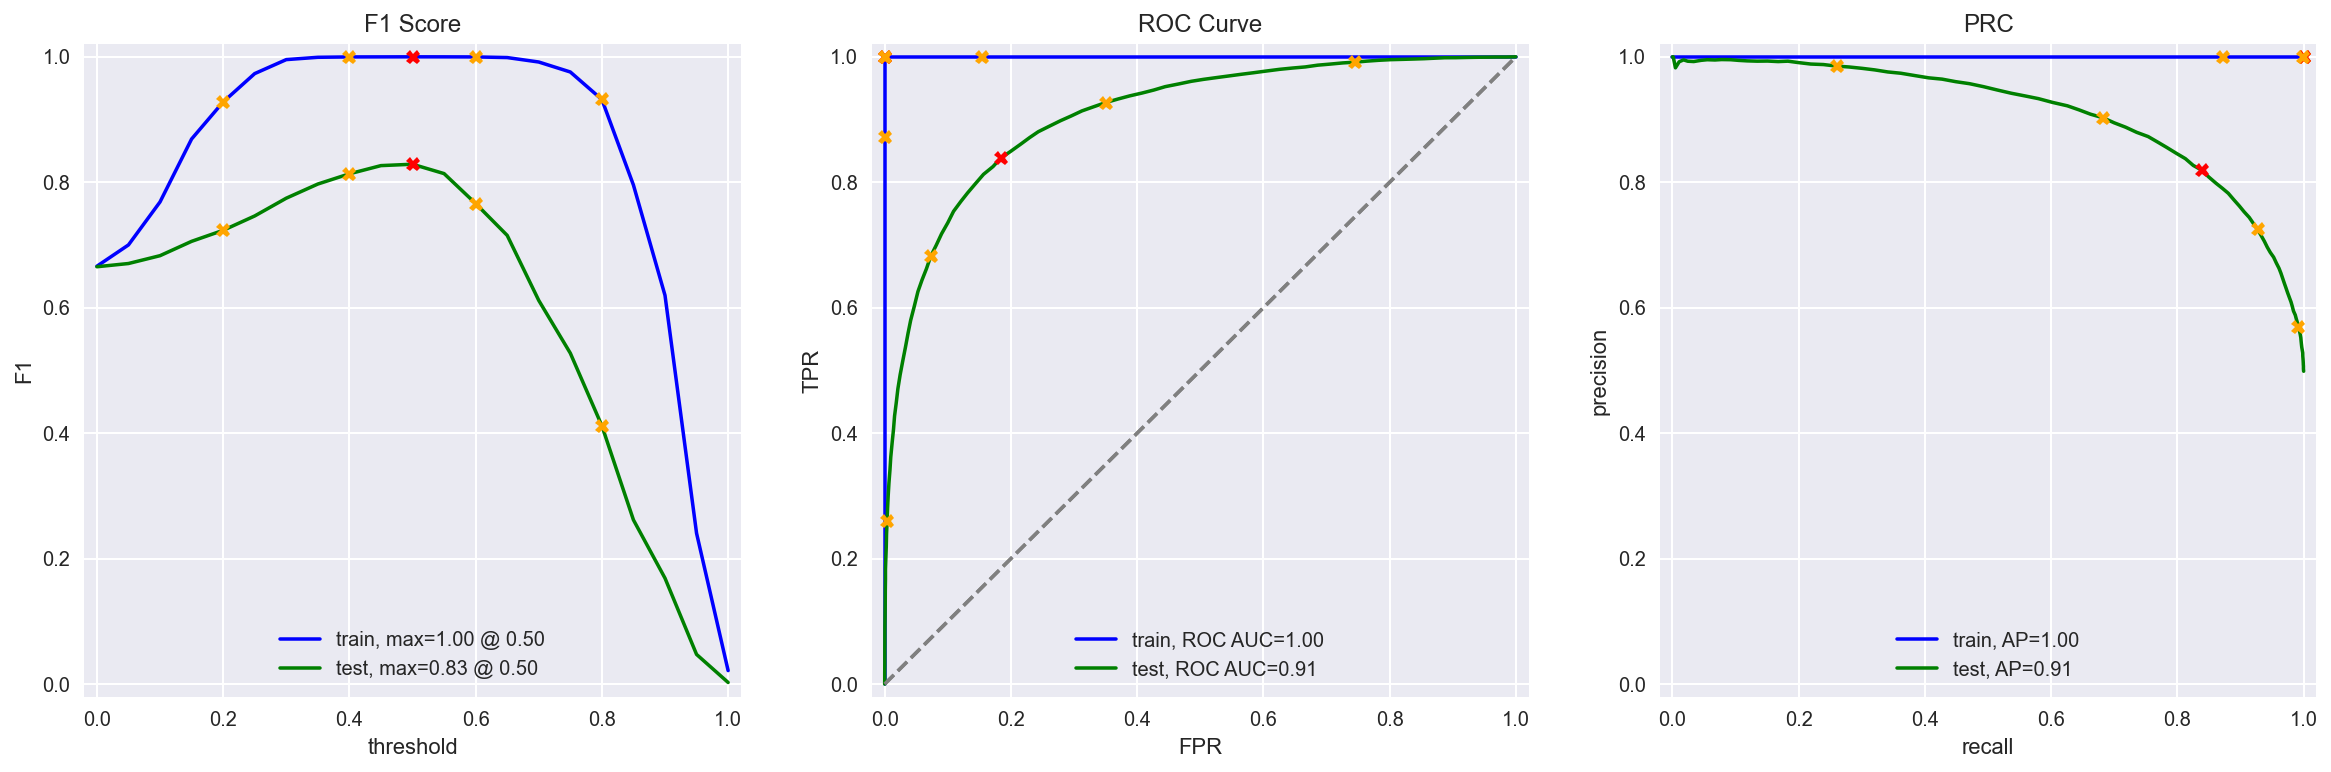

In [51]:
rfc_BERT = RandomForestClassifier()
rfc_BERT.fit(BERT_X_train, y_train)
evaluate_model(rfc_BERT, BERT_X_train, y_train, BERT_X_test, y_test)

#### Model 3: Stochastic Gradient Descent

          train  test
Accuracy   0.88  0.87
F1         0.88  0.87
APS        0.95  0.95
ROC AUC    0.95  0.95


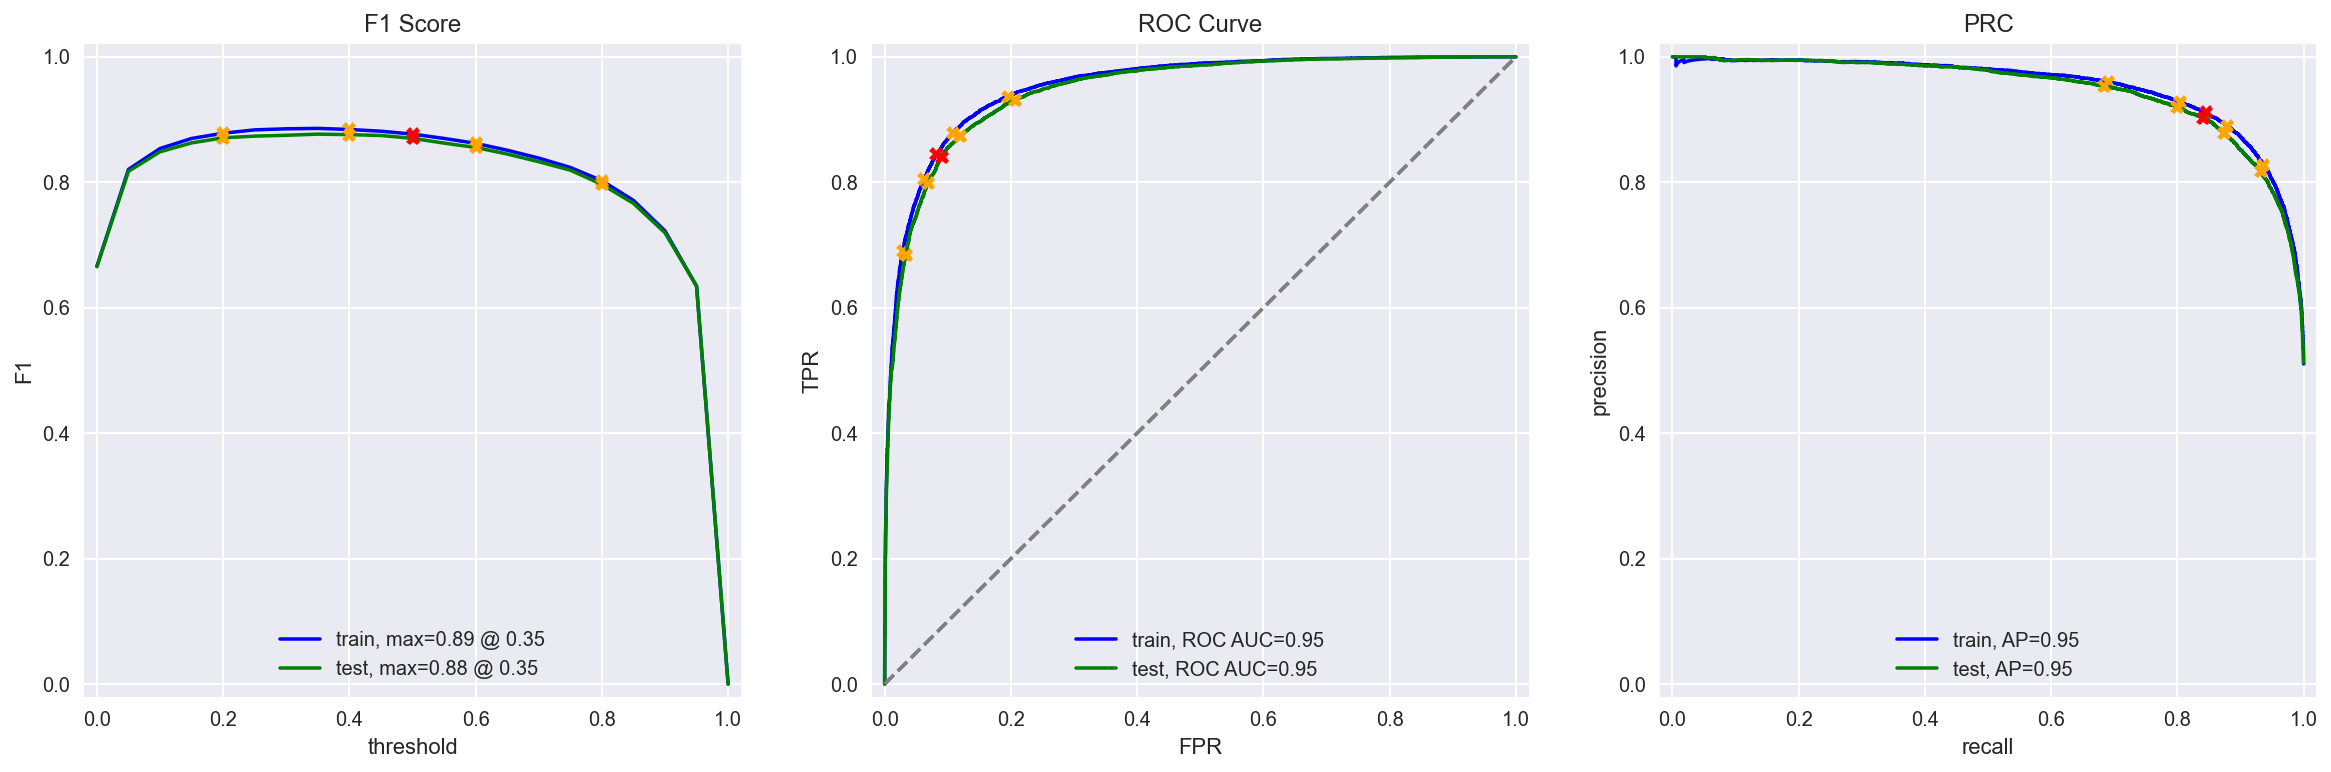

In [53]:
sgd_clf_BERT = SGDClassifier(loss='log') #The ‘log’ loss gives logistic regression, a probabilistic classifier
sgd_clf_BERT.fit(BERT_X_train, y_train)
evaluate_model(sgd_clf_BERT, BERT_X_train, y_train, BERT_X_test, y_test)

Except for the Random Forest Classifier, which again overfits again on the train set, the other two models do approximately the same on train and test sets. The F1 score and accuracy are about the same, which we interpret as a good sign, because there is some level of consistency. 

# My Reviews

In [141]:
my_reviews = pd.read_csv('Fleabag2.csv')

In [142]:
my_reviews

,rating,review
0,1,"I thought at first I might be comparing this, ..."
1,2,I like Brit humor but I didn't laugh once at a...
2,3,I can only conclude that most of the reviews a...
3,4,"Try-hard dark, satirical feminist piss-take. N..."
4,5,"What is the appeal? Season 1 was decent, Seaso..."
5,6,"I find Fleabag to be mildly amusing. However, ..."
6,7,Fleabag is shaping up as the most over-praised...
7,8,"Meet Fleabag- A sassy, attractive, sharp witte..."
8,9,Not my typical cup of tea. Watched an episode ...
9,10,I thought this show was so good I emailed BBC3...


In [143]:
my_reviews['review'] = my_reviews['review'].apply(clear_text).apply(str.lower)

In [144]:
my_reviews['review_spacy'] = my_reviews['review'].apply(lemmatize_spacy)
spacy_X = count_tf_idf.transform(my_reviews['review_spacy'])

In [148]:
sgd_clf_spacy.predict(spacy_X)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [149]:
glm_spacy.predict(spacy_X)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

# Project conclusion

<b>General Information</b><br>
Our data contains labeled reviews. The amount of positive and negative reviews are approximately the same, so classes are balanced.

<b>Data Preparation</b><br>
First we removed all symbols other than letters from texts and converted words to lower case. Then we applied several techniques to lemmatize texts: NLTK, SpaCy. We also vectorized texts with TF-IDF and BERT methods.<br>

<b>Models Output Analysis</b><br>
The best two models in terms of F1 score are Logistic Regression and SGD. They both gave F1 scores higher than the target of 0.85. Random Forest overfits on training set with 100% accuracy and goes poorly on the test set.
<br>

<b>Classifying own reviews</b><br>
We used reviews for Fleabag season 2 on IMDB website. We selected 10 reviews that gave rating to the series from min of 1 to max of 10. We used two models to make predictions: Logistic Regression and SGD. Both model identified reviews with ratting 1 to 6 and as negative and reviews with rating 7 to 10 as positive, which is we think is quite accurate.